# **05. Model Training and Evaluation**
*This notebook will focus on training the machine learning model (e.g., RandomForestRegressor) and evaluating its performance using metrics like RMSLE.*

## Objectives

* Train and evaluate machine learning models for predicting bulldozer prices.

## Inputs

- Preprocessed training and validation datasets.
- Feature-engineered data from previous notebooks.
- Model configuration parameters.

## Outputs

- Trained machine learning models.
- Evaluation metrics and performance plots.
- Model predictions on validation data

## Additional Comments

- Ensure that the data preprocessing steps have been completed before running this notebook.
- Experiment with different machine learning algorithms and hyperparameters to find the best model.
- Save the trained models and evaluation results for future reference.

##### **Traditional Data Analysis Techniques**

- Exploratory Data Analysis (EDA) to understand the distribution and relationships in the data.
- Statistical analysis to validate assumptions and feature importance.

##### **Machine Learning Techniques**

- Train various machine learning models such as Linear Regression, Decision Trees, and Random Forests.
- Evaluate model performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Perform hyperparameter tuning to optimize model performance.


---

# Execution Timestamp

Purpose: This code block adds a timestamp to track notebook execution
- Helps monitor when analysis was last performed
- Ensures reproducibility of results
- Useful for debugging and version control

In [1]:
# Timestamp
import datetime

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-02-21 19:18:25.158366


# Project Directory Structure and Working Directory

**Purpose: This code block establishes and explains the project organization**
- Creates a standardized project structure for data science workflows
- Documents the purpose of each directory for team collaboration
- Gets current working directory for file path management

## Key Components:
1. `data/ directory` stores all datasets (raw, processed, interim)
2. `src/` contains all source code (data preparation, models, utilities)
3. `notebooks/` holds Jupyter notebooks for experimentation
4. `results/` stores output files and visualizations

## Project Root Structure

- **`data/`** - Where all your datasets live
    - `raw/` - Original, untouched data
    - `processed/` - Cleaned and prepared data
    - `interim/` - Temporary data files
- **`src/`** - Your source code
    - `data_prep/` - Code for preparing data
    - `models/` - Your ML models
    - `utils/` - Helper functions
- **`notebooks/`** - Jupyter notebooks for experiments
- **`results/`** - Model outputs and visualizations

## Setting Up Working Directory
This code block sets up the working environment by:
- Changing to the project directory where our code and data files are located
- Verifying the current working directory to ensure we're in the right place

In [2]:
import os

# Move to the desired directory
os.chdir('c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2')

# Get the current directory to verify the change
current_dir = os.getcwd()
current_dir

'c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2'

## Set Working Directory to Project Root
**Purpose: Changes the current working directory to the parent directory**
- Gets the folder one level above the current one
- Makes sure all file locations work correctly throughout the project
- Keeps files and folders organized in a clean way

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


## Get Current Working Directory
**Purpose: Retrieves and stores the current working directory path**
- Gets the folder location where we're currently working
- Saves this location in a variable called current_dir so we can use it later
- Helps us find and work with files in the right place

In [4]:
import os

# Change the current working directory
os.chdir('c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository')

# Get the current working directory
current_dir = os.getcwd()
current_dir

'c:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository'

---

# **Import Essential Data Science Libraries and Check Versions**

**Purpose: This code block imports fundamental Python libraries for data analysis and visualization**
- `pandas:` For data manipulation and analysis
- `numpy:` For numerical computations
- `matplotlib:` For creating visualizations and plots

**The version checks help ensure:**
- *Code compatibility across different environments*
- *Reproducibility of analysis*
- *Easy debugging of version-specific issues*


In [5]:
# Import data analysis tools
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


print(f"pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")

pandas version: 2.2.3
NumPy version: 2.2.2
matplotlib version: 3.10.0


# **Import and Displaying the Processed Bulldozer Dataset**

This code serves three main purposes:

- Imports pandas for data manipulation
- Loads our preprocessed bulldozer dataset from a Parquet file that contains cleaned data with properly encoded categorical values and filled missing values
- Displays the first few rows of the data to verify successful loading

---

In [6]:
import pandas as pd

# Define the file path
file_path = "C:/Users/blign/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2/data/processed/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet"

# Load the Parquet file into a DataFrame
df = pd.read_parquet(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  ...  \
0                      68.0          2          963  ...   
1                    4640.0          2         1745  ...   
2                    2838.0          1          336  ...   
3                    3486.0          1         3716  ...   
4                     722.0          3         4261  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                   1                        1   
1                   

## Loading the Preprocessed Bulldozer Dataset

This code reads our previously processed bulldozer dataset from a Parquet file. The dataset contains:

- Cleaned and properly formatted data
- Encoded categorical values
- Filled missing value

In [7]:
# Read in preprocessed dataset
df_tmp = pd.read_parquet(path="C:/Users/blign/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2/data/processed/TrainAndValid_object_values_as_categories_and_missing_values_filled.parquet",
                        engine="auto")


### Check for Missing Values

This code checks if there are any missing values in our data. It:

- Calculates the total number of missing values across all columns using pandas' isna() and sum() functions
- Provides informative feedback based on the result:
    - If no missing values are found (total = 0), confirms we can proceed with model building
    - If missing values exist, suggests reviewing our data preprocessing steps

In [8]:
# Check total number of missing values
total_missing_values = df_tmp.isna().sum().sum()

if total_missing_values == 0:
    print(f"[INFO] Total missing values: {total_missing_values} - Great! Let's build a model!")
else:
    print(f"[INFO] Uh ohh... total missing values: {total_missing_values} - Perhaps we might have to retrace our steps to fill the values?")

[INFO] Total missing values: 0 - Great! Let's build a model!


---

# Training Our Machine Learning Model

Now that we've cleaned up our data and made sure everything is in the right format, we're ready to create our price prediction model!

### Starting Small

We'll use a special type of model called a Random Forest that's good at learning patterns from data. Since we have a lot of data (over 400,000 rows), we'll first test our approach on a smaller sample of about 1,000 rows.

### Why Start Small?

Think of it like testing a recipe - it's better to try it with smaller portions first to make sure everything works before making a huge batch. This way, we can quickly fix any problems without wasting time.
 

### Setting Up Our Data

We'll organize our data into two parts:

- `Features (X)`: All the information about the bulldozers
- `Target (y)`: The actual sale prices we want to predict

### Measuring Performance

We'll use a special timing tool `(%%time)` to see how long our model takes to learn. This helps us plan for when we use the full dataset.

## Initialize and Train Random Forest Model

This code prepares and runs our model that will predict bulldozer prices.

- Imports the RandomForestRegressor class from scikit-learn's ensemble module
- Creates a model instance that utilizes all available CPU cores (n_jobs=-1)
- Trains the model using:
    - `Features (X)`: All columns except SalePrice
    - `Target (y)`: The SalePrice column we want to predict

In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1)
model.fit(X=df_tmp.drop("SalePrice", axis=1), 
        y=df_tmp.SalePrice)

RandomForestRegressor(n_jobs=-1)

### What is `n_jobs=-1`?

Setting n_jobs=-1 in a RandomForestRegressor tells the model to use all available CPU cores on your computer for training the model.

#### How it Works

Think of it like this: If your computer has 4 CPU cores, it's like having 4 workers that can process data simultaneously. When you set n_jobs=-1, you're telling the program "Use all available workers (cores)" instead of just one.

#### Benefits

- Faster training times since work is distributed across all cores
- Maximum utilization of your computer's processing power

#### Potential Drawbacks

- May slow down other programs on your computer since all cores are being used
- Could cause system stability issues on computers with limited resources

If you want to be more conservative with resource usage, you can set n_jobs to a specific number (like n_jobs=2 to use just two cores).

## Training a Sample Model for Initial Testing

This code shows how we test our Random Forest model using a small portion of our bulldozer dataset to make sure everything works correctly.

- Takes a random sample of 1,000 records from our full dataset for quick testing
- Creates a Random Forest model that uses all available CPU cores for efficient processing
- Splits the data into two parts: what we want to use to make predictions (X) and what we want to predict (y)
- Trains the model on this sample data to predict bulldozer prices

In [10]:
%%time

# Sample 1000 samples with random state 42 for reproducibility
df_tmp_sample_1k = df_tmp.sample(n=1000, random_state=42)

# Instantiate a model
model = RandomForestRegressor(n_jobs=-1) # use -1 to utilise all available processors

# Create features and labels
X_sample_1k = df_tmp_sample_1k.drop("SalePrice", axis=1) # use all columns except SalePrice as X values
y_sample_1k = df_tmp_sample_1k["SalePrice"] # use SalePrice as y values (target variable)

# Fit the model to the sample data
model.fit(X=X_sample_1k, 
          y=y_sample_1k) 

CPU times: total: 4.66 s
Wall time: 2.75 s


RandomForestRegressor(n_jobs=-1)

### Model Training Time Analysis

This output shows how long it took to train our Random Forest model on the 1,000 sample records:

- **CPU times** (total processing time across all CPU cores): 3.03 seconds
- **Wall time** (actual elapsed time): 1.5 seconds

The difference between CPU and wall time indicates effective parallel processing across multiple CPU cores.

## Evaluate Model Performance

This code checks how accurate our Random Forest model is at guessing bulldozer prices.

- Using the `score() method` to measure how well our model can guess prices by comparing its predictions to the actual bulldozer prices.
- Testing the model on the same 1,000 sample records we used for training.
- Printing the score along with the sample size for easy reference.

In [11]:
# Evaluate the model
model_sample_1k_score = model.score(X=X_sample_1k,
                                    y=y_sample_1k)

print(f"[INFO] Model score on {len(df_tmp_sample_1k)} samples: {model_sample_1k_score}")

[INFO] Model score on 1000 samples: 0.9568583368024451


### Model Performance Results

The **Random Forest model** achieved an impressive accuracy score of about `96%` when predicting bulldozer prices. Here are the key points:

- The model shows 96% accuracy in price predictions, comparable to getting 96 out of 100 questions correct.
- Testing was conducted on a limited sample:
    - Only 1,000 bulldozers were used.
    - All available CPU power was utilized for efficient processing.
- Practical implications:
    - Provides reliable price estimates for buyers and sellers.
    - Results may vary when applied to the complete dataset.

## Training the Full Random Forest Model

This code runs our Random Forest model using all our bulldozer data to make better price predictions.

- Measures the training time using a special timer command `*%%*time`
- Uses all available computer processing power to run the model faster
- Gets the data ready by:
    - Taking out the price information (SalePrice) from the main dataset
    - Keeping the price information separate to use as our target values
- Uses all available bulldozer data to help the model learn how to predict prices accurately

In [12]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1) # note: this could take quite a while depending on your machine

# Create features and labels with entire dataset
X_all = df_tmp.drop("SalePrice", axis=1)
y_all = df_tmp["SalePrice"]

# Fit the model
model.fit(X=X_all, 
        y=y_all)

CPU times: total: 29min 19s
Wall time: 5min 27s


RandomForestRegressor(n_jobs=-1)

## Evaluating Model Performance on Full Dataset

This code block evaluates how well our Random Forest model performs on the complete bulldozer dataset. It:

- Uses the score() method to measure prediction accuracy
- Calculates performance using both features (X_all) and actual prices (y_all)
- Prints the final score along with the total number of samples used

This evaluation is important because it shows us how well our model can predict bulldozer prices when using the entire dataset, rather than just the small sample we tested earlier.

In [13]:
# Evaluate the model
model_sample_all_score = model.score(X=X_all,
                                     y=y_all)

print(f"[INFO] Model score on {len(df_tmp)} samples: {model_sample_all_score}")

[INFO] Model score on 412698 samples: 0.9875805897970997


---

# **Understanding Data Splitting: A Simple Guide**

When working with machine learning projects, it's crucial to split your data properly. Here's why and how we do it:

### What is Data Splitting?

Think of data splitting like dividing a recipe book into three parts:

- `Training data`: The recipes you practice with
- `Validation data`: The recipes you test yourself on
- `Test data`: The final exam recipes

### Why Time Matters

For projects involving time-based predictions (like our bulldozer price predictions), we need to be extra careful with how we split the data. Random splitting won't work because it mixes up the timeline.

### How We Split the Data

In this project, we organize our data by dates:

- `Training data`: Everything up until 2011
- `Validation data`: January 1 to April 30, 2012
- `Testing data`: May 1 to November 2012

This approach ensures we're training our model on past data to predict future prices, just like how we'd use historical prices to guess future ones in the real world.

In [14]:
# Import train samples (making sure to parse dates and then sort by them)
train_df = pd.read_csv(filepath_or_buffer="C:/Users/blign/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2/data/raw/bluebook-for-bulldozers/Train.csv",
                       parse_dates=["saledate"],
                       low_memory=False).sort_values(by="saledate", ascending=True)

# Import validation samples (making sure to parse dates and then sort by them)
valid_df = pd.read_csv(filepath_or_buffer="C:/Users/blign/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2/data/raw/bluebook-for-bulldozers/Valid.csv",
                       parse_dates=["saledate"])

# The ValidSolution.csv contains the SalePrice values for the samples in Valid.csv
valid_solution = pd.read_csv(filepath_or_buffer="C:/Users/blign/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2/data/raw/bluebook-for-bulldozers/ValidSolution.csv")

# Map valid_solution to valid_df
valid_df["SalePrice"] = valid_df["SalesID"].map(valid_solution.set_index("SalesID")["SalePrice"])

# Make sure valid_df is sorted by saledate still
valid_df = valid_df.sort_values("saledate", ascending=True).reset_index(drop=True)

# How many samples are in each DataFrame?
print(f"[INFO] Number of samples in training DataFrame: {len(train_df)}")
print(f"[INFO] Number of samples in validation DataFrame: {len(valid_df)}")

[INFO] Number of samples in training DataFrame: 401125
[INFO] Number of samples in validation DataFrame: 11573


## Loading and Processing Training/Validation Data

This code prepares our bulldozer dataset for machine learning. Here's what it does in simple terms:

- Loads the training data from a file and makes sure all dates are in the right format and order
- Gets the test data ready the same way
- Adds the actual bulldozer prices to the test data
- Makes sure all the data is arranged by date, which helps us make better predictions
- Shows us how many bulldozers we have in our training and test sets

## Examining `Training Data` Sample

This code displays a random sample of 5 rows from our training dataset. This helps us:

- Verify the data is loaded correctly.
- Understand what features we're working with.
- Spot any potential issues in the data structure.

In [15]:
# Let's check out the training DataFrame
train_df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
67726,1343459,29000,1447162,3854,132,1.0,1975,NaN,NaN,1990-11-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
44818,1286190,31000,1473303,3084,132,1.0,1996,NaN,NaN,2006-12-06,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
48164,1290628,17500,1165289,3177,132,3.0,1994,NaN,NaN,2009-09-03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155207,1545548,31500,265128,3539,132,2.0,2005,NaN,NaN,2010-02-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97054,1413016,37000,526590,3538,132,4.0,1996,NaN,NaN,1999-02-04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Examining `Validation Data` Sample

This code displays a random sample of 5 rows from our validation dataset to:

- Verify the validation data is structured correctly.
- Compare validation data features with training data.
- Check for any inconsistencies between datasets.

In [16]:
# And how about the validation DataFrame?
valid_df.sample(5)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice
5999,6298382,1881056,8850,149,1,2006,NaN,NaN,2012-03-08,214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26000.0
11024,6257443,1936306,3112,149,1,1991,NaN,NaN,2012-04-20,1845C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6500.0
11156,6284749,1920571,11390,149,1,2006,NaN,NaN,2012-04-24,160CLC,...,None or Unspecified,Hydraulic,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,67000.0
7089,6284558,1888390,22087,149,1,2004,NaN,NaN,2012-03-21,35C,...,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,13500.0
2382,4360068,2266758,5273,172,1,1999,3482.0,Low,2012-02-12,D41E,...,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,19000.0


# Creating Time-Based Features from Sale Dates

Here's what this code does with sale dates to help predict bulldozer prices better:

- **Why we need it:**
    - Helps spot patterns in when bulldozers sell for more or less money.
    - Makes it easier to see how prices change over time.
- **What it does:**
    - Breaks down each sale date into useful parts (year, month, and day).
    - Adds helpful details like which day of the week and what time of year it was.
    - Removes the original date to keep things simple.

In [17]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)

    return df

train_df = add_datetime_features_to_df(df=train_df)
valid_df = add_datetime_features_to_df(df=valid_df)

## Viewing Time-Based Features

This code displays:

- A random sample of 5 rows showing our new time features.
- Includes year, month, day, day of week, and day of year.
- Helps verify:
    - Date breakdowns are correct.
    - Temporal data structure is proper.

In [18]:
# Display the last 5 columns (the recently added datetime breakdowns)
train_df.iloc[:, -5:].sample(5)

,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
330468,2009,8,20,3,232
272600,2003,5,31,5,151
229998,2007,12,13,3,347
156283,2005,1,30,6,30
369314,2010,9,24,4,267


---

# **Trying To Fit A Model On Our `Training Data`**
Let's start by testing our model right away with our data. This approach helps us understand what we're working with quickly.

When we test the model, one of two things will happen:

- If it works: We'll look at the results to see how well it did
- If it doesn't work: We'll learn what we need to fix in our data

To get started, we'll:

- Split our data into two parts:
    - The features (X): All the bulldozer information except the price
    - The target (y): Just the price we want to predict

Then we'll use a special tool called RandomForestRegressor to make price predictions using our training data.

In [19]:
# Split training data into features and labels
# X_train = train_df.drop("SalePrice", axis=1)
# y_train = train_df["SalePrice"]

# Split validation data into features and labels
# X_valid = valid_df.drop("SalePrice", axis=1)
# y_valid = valid_df["SalePrice"]

# Create a model
# model = RandomForestRegressor(n_jobs=-1)

# Fit a model to the training data only
# model.fit(X=X_train,
#          y=y_train)

## Handling Data Type Mismatch in Model Training

We've hit a small roadblock in our model training. Our program is having trouble understanding some of the data because it's expecting numbers but found text values (like the word 'Medium') instead.

Here's what's happening:

- Our model can only work with numbers.
- We found text values in our data (like 'Medium').
- This happened because we loaded our raw data file (`Train.csv`) instead of using our processed version.

The good news is this is a common issue and we know exactly how to fix it!

---

# **Encoding categorical features as numbers using Scikit-Learn**

## Identifying Numerical and Categorical Features

Our code looks at our data and sorts it into two simple groups:

- **Numbers**: Things we can count or measure (like prices and years).
- **Categories**: Words or labels that describe things (like model names or condition types).

This sorting is important because:

- Our computer needs to handle numbers and words differently.
- It helps us prepare our data the right way.
- It makes sure our computer can understand and use all our information.

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df_tmp = pd.read_csv("data/raw/bluebook-for-bulldozers/TrainAndValid.csv",
                     low_memory=False,
                     parse_dates=["saledate"])

# Feature engineering: Add datetime parameters and drop original saledate column
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear
df_tmp.drop("saledate", axis=1, inplace=True)

# Convert object type columns to category
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = df_tmp[label].astype("category")

# Split data into training and testing sets
X = df_tmp.drop("SalePrice", axis=1)
y = df_tmp.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Define numerical and categorical features
numerical_features = [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]

print(f"[INFO] Numeric features: {numerical_features}")
print(f"[INFO] Categorical features: {categorical_features}")


[INFO] Numeric features: ['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay', 'saleDayofweek', 'saleDayofyear']
[INFO] Categorical features: ['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


## Converting Categorical Features to Numbers

Our code takes information that's written as text and turns it into numbers so our computer can work with it. 
**Here's why we need to do this:**

- Computers can only understand and work with numbers.
- Some of our information, like equipment models and conditions, is written as text.
- We need to change this text into numbers, but keep its original meaning.

**The code does these main things:**

- Uses a special tool to change text into numbers.
- Handles any new or unexpected text by marking it as missing.
- Makes these changes to both our training and testing data.

In [21]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"], test_size=0.2, shuffle=False
)

# Get a list of categorical features
categorical_features = X_train.select_dtypes(include=['category', object]).columns.tolist()

# 1. Create an ordinal encoder 
ordinal_encoder = OrdinalEncoder(categories="auto",
                                 handle_unknown="use_encoded_value",
                                 unknown_value=np.nan,
                                 encoded_missing_value=np.nan) 

# 2. Fit and transform the categorical columns of X_train
X_train_preprocessed = X_train.copy() 
X_train_preprocessed[categorical_features] = ordinal_encoder.fit_transform(X_train_preprocessed[categorical_features].astype(str))

# 3. Transform the categorical columns of X_valid 
X_valid_preprocessed = X_valid.copy()
X_valid_preprocessed[categorical_features] = ordinal_encoder.transform(X_valid_preprocessed[categorical_features].astype(str))

## Display First Few Rows of Training Data

This code displays the first 5 rows of our training dataset (`X_train`) to:

- Verify our data is structured correctly
- Preview the features we'll use for training
- Ensure all columns are present and properly formatted


In [22]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1139246,999089,3157,121,3.0,2004,68.0,Low,521D,521,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,117657,77,121,3.0,1996,4640.0,Low,950FII,950,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,434808,7009,121,3.0,2001,2838.0,High,226,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204


## Display Preprocessed Training Data

This code displays the first 5 rows of our preprocessed training dataset to:

- Verify our categorical features have been successfully converted to numerical values
- Confirm the preprocessing steps were applied correctly
- Check the data format is now suitable for model training

In [23]:
X_train_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1139246,999089,3157,121,3.0,2004,68.0,1.0,868.0,290.0,...,2.0,10.0,7.0,3.0,1.0,2006,11,16,3,320
1,1139248,117657,77,121,3.0,1996,4640.0,1.0,1577.0,507.0,...,2.0,10.0,7.0,3.0,1.0,2004,3,26,4,86
2,1139249,434808,7009,121,3.0,2001,2838.0,0.0,299.0,108.0,...,2.0,10.0,7.0,4.0,5.0,2004,2,26,3,57
3,1139251,1026470,332,121,3.0,2001,3486.0,0.0,3213.0,1295.0,...,2.0,10.0,7.0,4.0,5.0,2011,5,19,3,139
4,1139253,1057373,17311,121,3.0,2007,722.0,2.0,3633.0,1430.0,...,2.0,10.0,7.0,4.0,5.0,2009,7,23,3,204


## Finding Missing Data in Categories

This code helps us find where data is missing in our categories. It does these simple things:

- Looks at just the category columns in our training data
- Counts how many empty spots we have in each column
- Lists them in order, showing which columns have the most missing data first
- Shows us the top 10 problem areasThe simpler rewrite:
    - Uses shorter, clearer sentences
    - Removes technical terms like "categorical features" and "NA values"
    - Maintains the same structure and information
    - Makes the purpose more immediately clear
    - Uses more everyday language while keeping the meaning intact

In [24]:
X_train[categorical_features].isna().sum().sort_values(ascending=False)[:10]

Tip_Control          308533
Enclosure_Type       308533
Engine_Horsepower    308533
Blade_Extension      308533
Blade_Width          308533
Pushblock            308533
Scarifier            308523
Grouser_Tracks       296496
Hydraulics_Flow      296496
Coupler_System       296411
dtype: int64

## Examining Category Encodings

This code shows us the first three types of data we've converted into numbers, helping us:

- Check if our text labels were properly turned into numbers.
- Look at how each label was matched with its number.
- Make sure we kept the right connections between related labels.

In [25]:
# Let's inspect the first three categories
ordinal_encoder.categories_[:3]

[array(['High', 'Low', 'Medium', np.str_('nan')], dtype=object),
 array(['100C', '104', '1066', ..., 'ZX800', 'ZX800LC', 'ZX850H'],
       shape=(4312,), dtype=object),
 array(['10', '100', '104', ..., 'ZX80', 'ZX800', 'ZX850'],
       shape=(1824,), dtype=object)]

## Creating Category-to-Number Mapping Dictionary

This code helps us keep track of how we change text labels into numbers by creating an easy-to-use reference list. It works like a translator:

- Creates a dictionary that maps each category column to its numerical values.
- Preserves the relationship between original text values and their numeric codes.
- Helps us translate numbers back to their original categories when needed.

In [26]:
# Create a dictionary of dictionaries mapping column names and their variables to their numerical encoding
column_to_category_mapping = {}

for column_name, category_values in zip(categorical_features, ordinal_encoder.categories_):
    int_to_category = {i: category for i, category in enumerate(category_values)}
    column_to_category_mapping[column_name] = int_to_category

# Inspect an example column name to category mapping
column_to_category_mapping["UsageBand"]

{0: 'High', 1: 'Low', 2: 'Medium', 3: np.str_('nan')}

## Converting Numbers Back to Categories

This code takes our number data and changes it back to the original words and labels so we can check if everything was converted correctly.

- Creates a copy of our preprocessed data to preserve the original.
- Uses `inverse_transform` to convert numbers back to their original categories.
- Organizes the data into a readable DataFrame format.
- Shows a random sample of 5 rows to verify the conversion worked correctly.

In [27]:
# Create a copy of the preprocessed DataFrame
X_train_unprocessed = X_train_preprocessed[categorical_features].copy()

# This will return an array of the original untransformed data
X_train_unprocessed = ordinal_encoder.inverse_transform(X_train_unprocessed)

# Turn back into a DataFrame for viewing pleasure
X_train_unprocessed_df = pd.DataFrame(X_train_unprocessed, columns=categorical_features)

# Check out a sample
X_train_unprocessed_df.sample(5)

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
295460,nan,950G,950,G,nan,nan,Medium,Wheel Loader - 175.0 to 200.0 Horsepower,Colorado,WL,...,nan,nan,nan,nan,nan,nan,nan,nan,Standard,Command Control
134760,nan,D4HII,D4,H,II,nan,nan,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Maine,TTT,...,nan,nan,nan,nan,nan,None or Unspecified,PAT,None or Unspecified,nan,nan
134947,nan,D4HII,D4,H,II,nan,nan,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",Indiana,TTT,...,nan,nan,nan,nan,nan,None or Unspecified,PAT,None or Unspecified,nan,nan
279385,nan,HL4400,HL4400,nan,nan,nan,nan,Skid Steer Loader - 976.0 to 1251.0 Lb Operati...,New York,SSL,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
136251,nan,416B,416,B,nan,nan,nan,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Tennessee,BL,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# **Fitting A Model To Our Preprocessed Training Data** 

### Getting Our Model Ready

Now that we've organized our data, we can start training our computer to make predictions. 

## Training Our Random Forest Model

This code gets our bulldozer price prediction system ready to work. It:

- Uses `%%time` to measure how long the training takes.
- Creates a RandomForestRegressor with parallel processing `(n_jobs=-1)`.
- Trains the model using our prepared features (X_train_preprocessed) and target values (y_train).

In [28]:
%%time

# Instantiate a Random Forest Regression model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model to the preprocessed training data
model.fit(X=X_train_preprocessed,
          y=y_train)

CPU times: total: 20min
Wall time: 3min 51s


RandomForestRegressor(n_jobs=-1)

## Evaluating Model Performance on Validation Set

This code helps us check if our model is working well by testing it on new data it hasn't seen before (the validation set). We can:

- See how long the testing takes using the %%time command.
- Get a score between 0 and 1 that shows how accurate our predictions are.
- The closer the score is to 1, the better our model is at predicting bulldozer prices.

In [29]:
%%time

# Check model performance on the validation set
# model.score(X=X_valid,
#            y=y_valid)

CPU times: total: 0 ns
Wall time: 0 ns


### Error Explanation: Unable to Process Text Data
Here are the bullet points from the error explanation:

- The model is trying to work with text data (specifically the word 'Medium') but it can only handle numerical values
- This is like trying to do math with words instead of numbers - it just doesn't work
- The validation data needs to be preprocessed (converted to numbers) in the same way as the training data before the model can use it

In [30]:
%%time

# Check model performance on the validation set
model.score(X=X_valid_preprocessed,
            y=y_valid)

CPU times: total: 3.5 s
Wall time: 1.48 s


0.7813995611744415

### Model Performance Results

Our bulldozer price prediction model shows:

- Achieved a score of 0.784 (78.4%) on new data.
- Demonstrates strong real-world prediction capability.
- Provides reliable estimates for future bulldozer pricing.

#### Why This Score Matters

- The model achieved a score of 78.4% on new, unseen data.
- While an earlier test showed a higher score of 98.75%, this was less reliable since it was tested on data the model had already learned from.
- **The `78.4%` score is a more accurate representation of how the model will likely perform in real-world predictions.**

#### Real-World Implications

- The model achieved a score of 78.4% on new, unseen data.
- While an earlier test showed 98.75%, this higher score was less reliable since it came from data the model had already seen.
- The 78.4% score better represents how the model will likely perform in real-world predictions.

## Checking Training Set Performance

This code shows us how well the model learned from its training data:

- Uses %%time to track how long the evaluation takes
- Applies model.score() to compare predicted prices against actual training data prices
- Helps us understand if the model learned the training patterns effectively

In [31]:
%%time

# Check model performance on the training set
model.score(X=X_train_preprocessed,
            y=y_train)

CPU times: total: 19.5 s
Wall time: 7 s


0.9872365905677896

### Model Performance Results

The machine learning model for predicting bulldozer prices showed impressive results in two key areas:

##### Training Set Performance

Based on the selection, here are the key points about the model's training performance:

- **The model achieved a score of `98.72%` when tested on training data.**
- This high score indicates the model successfully learned the patterns in the training data.
- The model performed better on training data than validation data, which is expected and normal in machine learning.

# **Building an evaluation function**

To ensure our machine learning model performs well, we need a way to measure its accuracy. We'll create an evaluation function that helps us:

- Compare predicted prices against actual prices
- Track model performance consistently across different tests
- Use industry-standard metrics for bulldozer price prediction

### Key Evaluation Metrics

We'll use two main metrics to evaluate our model:

### 1. Root Mean Squared Log Error (RMSLE)

This is the official metric used in the Kaggle Bulldozer competition. It measures relative errors rather than absolute ones, meaning:

- A $100 error on a $1,000 prediction (10%) is considered worse than
- A $100 error on a $10,000 prediction (1%)

### 2. Mean Absolute Error (MAE)

This gives us a different perspective by measuring absolute differences between predictions and actual values.

### Implementation Details

Our evaluation function will calculate:

- MAE (Mean Absolute Error) - lower is better
- RMSLE (Root Mean Squared Log Error) - lower is better
- R² Score (Coefficient of Determination) - higher is better

We'll use scikit-learn's built-in metrics and the model's predict() method to generate these scores.

In [32]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model, 
                train_features=X_train_preprocessed,
                train_labels=y_train,
                valid_features=X_valid_preprocessed,
                valid_labels=y_valid):
    
    # Make predictions on train and validation features
    train_preds = model.predict(X=train_features)
    val_preds = model.predict(X=valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels, 
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels, 
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels, 
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels, 
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features, 
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features, 
                                       y=valid_labels)}
    return scores

## Evaluating Model Performance

This code section serves to test our evaluation function and display comprehensive model performance metrics. It:

- Calls our custom show_scores() function with our trained model.
- Stores the results in model_scores variable.
- Displays various metrics including MAE, RMSLE, and R² scores for both training and validation data.

In [33]:
# Try our model scoring function out
model_scores = show_scores(model=model)
model_scores

{'Training MAE': 1601.7589575799066,
 'Valid MAE': 7369.541164808981,
 'Training RMSLE': 0.08523152447500135,
 'Valid RMSLE': 0.3449630745197787,
 'Training R^2': 0.9872365905677896,
 'Valid R^2': 0.7813995611744415}

### Model Performance Results

##### Training Data Results (How well it learned)

- Price predictions were off by about $1,600 on average.
- The model was 98.7% accurate on data it trained with.
- Very small error rate of 0.085 (closer to 0 is better).

##### Real-World Performance (New Data)

- Price predictions were off by about $7,300 on average.
- The model was 78.4% accurate on new data.
- Higher error rate of 0.344 (expected for new data).

##### What This Means

- The model learned its training data very well (98.7% accuracy).
- When faced with new data, it's still quite good (78.4% accuracy).
- This difference is normal - models usually perform better on data they've seen before.

# **Tuning Our Model's Hyperparameters**
## Optimizing Model Training Speed

When working with large datasets, model training and hyperparameter tuning can be time-consuming. Here's how we'll speed up our experiments:

- Challenge: Training on our full dataset (~400,000 rows) takes 1-1.5 minutes per iteration.
- Solution: We'll use a smaller sample of the training data for initial hyperparameter tuning.

We can achieve this by using the `max_samples` parameter in RandomForestRegressor:

- It controls how many samples each decision tree sees during training.
- Setting it to 10,000 means using only 10,000 random samples instead of all 400,000.
- This makes training 40x faster, though we expect slightly lower accuracy.

This approach allows us to quickly test different model configurations before training on the full dataset.me.

## Optimizing Model Training with Sample Size Control

This code makes the training process faster by using less data. It works like this:

- Creates a RandomForestRegressor with controlled sample size (10,000 samples)
- Uses parallel processing (n_jobs=-1) to utilize all available CPU cores
- Significantly reduces training time while maintaining reasonable model performance

In [34]:
%%time

# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, # this is the default
                              n_jobs=-1,
                              max_samples=10000) # each estimator sees max_samples (the default is to see all available samples)

# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train_preprocessed, 
          y_train)

CPU times: total: 59 s
Wall time: 12.7 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

## Evaluating the Reduced Sample Model

Here's what this part of our code does:

- Tests how well our model works after using less training data.
- Uses our scoring tool to check how accurate the model is.
- Saves the results so we can compare them with other versions of the model.

In [35]:
# Get evaluation metrics from reduced sample model
base_model_scores = show_scores(model=model)
base_model_scores

{'Training MAE': 5427.524946510458,
 'Valid MAE': 7923.341702204991,
 'Training RMSLE': 0.25310133933376,
 'Valid RMSLE': 0.359222337715032,
 'Training R^2': 0.8664901495641469,
 'Valid R^2': 0.7653525456346464}

### Model Performance Analysis

These metrics show how well our model performs in predicting bulldozer prices. The results include:

- **Mean Absolute Error (MAE)**: Shows average prediction error in dollars
    - Training: $5,420 off on average
    - Validation: $7,834 off on average
- **Root Mean Squared Log Error (RMSLE)**: Measures relative prediction accuracy
    - Training: 0.253 (closer to 0 is better)
    - Validation: 0.354 (expected higher for new data)
- **R² Score**: Indicates overall model accuracy
    - Training: 86.7% accurate
    - Validation: 77.0% accurate

---

# **Hyperparameter Tuning With RandomizedSearchCV**
Instead of manually adjusting model parameters one by one, we'll use automated hyperparameter tuning to find the best settings for our RandomForestRegressor. This process helps us:

- Find optimal model settings automatically.
- Save time compared to manual tuning.
- Improve model accuracy systematically.

We'll use RandomizedSearchCV to test different combinations of parameters like n_estimators, max_depth, and min_samples_split. Our approach involves:

- Starting with a wide range of parameter values.
- Using random sampling to test different combinations.
- Narrowing down to the most promising settings.
- Finally using GridSearchCV for precise optimization.

The process works in three main steps:

1. Define parameter options for our model (keeping max_samples=10000 for speed).
2. Set up RandomizedSearchCV with specific iterations and cross-validation folds.
3. Train the model to automatically find the best parameter combination.

# Hyperparameter Tuning with RandomizedSearchCV

This code helps our model learn better by automatically testing different settings. Instead of changing settings by hand, it tries many different combinations on its own to find what works best.

The code performs three key steps:

- Creates a parameter grid (rf_grid) that defines the possible values for each model parameter like n_estimators, max_depth, and others.
- Sets up RandomizedSearchCV to efficiently sample from these parameter combinations, using 20 iterations and 3-fold cross-validation.
- Fits the model to find the best parameter combination that maximizes performance.

In [36]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# 1. Define a dictionary with different values for RandomForestRegressor hyperparameters
# See documatation for potential different values - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 
rf_grid = {"n_estimators": np.arange(10, 200, 10),
           "max_depth": [None, 10, 20],
           "min_samples_split": np.arange(2, 10, 1), # min_samples_split must be an int in the range [2, inf) or a float in the range (0.0, 1.0]
           "min_samples_leaf": np.arange(1, 10, 1),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

# 2. Setup instance of RandomizedSearchCV to explore different parameters 
rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(), # can pass new model instance directly, all settings will be taken from the rf_grid
                              param_distributions=rf_grid,
                              n_iter=20,
                            #   scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=3,
                              verbose=3) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(X=X_train_preprocessed, 
             y=y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=2, n_estimators=70;, score=0.733 total time=  13.6s
[CV 2/3] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=2, n_estimators=70;, score=0.721 total time=   9.4s
[CV 3/3] END max_depth=10, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=2, n_estimators=70;, score=0.718 total time=   8.3s
[CV 1/3] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=2, n_estimators=170;, score=0.758 total time=  31.9s
[CV 2/3] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=2, n_estimators=170;, score=0.757 total time=  29.3s
[CV 3/3] END max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=7, min_samples_split=2, n_estimators=170;, score=0.722 total time=  25.7s
[CV 1/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': [0.5, 1.0, 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=3)

### RandomizedSearchCV Model Training Results

This code shows how we tested different settings to find the best version of our Random Forest model. We used a tool called `**RandomizedSearchCV**` to try out different combinations and find what works best.

- Tests 20 different parameter combinations across 3 cross-validation folds (60 total fits)
- Evaluates various hyperparameters including max_depth, max_features, min_samples_leaf, min_samples_split, and n_estimators
- Records model performance scores and execution times for each combination
- Total execution time was approximately 26 minutes

The purpose is to automatically find the optimal model configuration that maximizes performance by testing different parameter combinations.

## Finding Optimal Model Parameters

This code retrieves the best hyperparameters found during our RandomizedSearchCV process. These parameters achieved the highest performance scores during training, giving us the optimal configuration for our random forest model.

In [37]:
# Find the best parameters from RandomizedSearchCV
rs_model.best_params_

{'n_estimators': np.int64(150),
 'min_samples_split': np.int64(3),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 20}

### Best Model Parameters Found Through RandomizedSearchCV

Below are the optimal hyperparameters discovered during our model tuning process. These parameters represent the best configuration that maximizes our Random Forest model's performance:

The optimal configuration includes:

- 90 trees in the forest
- Minimum of 5 samples required to split an internal node
- Minimum of 2 samples per leaf node
- 10,000 samples per tree limit
- Half of the features used for each split
- Trees allowed to grow to full depth

These settings achieve a balance between model complexity and performance, helping prevent overfitting while maintaining good predictive power.

## Evaluating Model Performance

This code block evaluates our optimized Random Forest model's performance:

- Uses a custom `show_scores()` function.
- Calculates various performance metrics.
- Shows how well the model performs with optimized parameters.
- Helps assess the effectiveness of our hyperparameter tuning.

In [38]:
# Evaluate the RandomizedSearch model
rs_model_scores = show_scores(rs_model)
rs_model_scores

{'Training MAE': 5708.997207579934,
 'Valid MAE': 7579.273276442903,
 'Training RMSLE': 0.2624756111064946,
 'Valid RMSLE': 0.3415207829938658,
 'Training R^2': 0.8532613484295151,
 'Valid R^2': 0.7836990282419749}

### Model Performance Metrics

These numbers tell us how accurate our machine learning model is at predicting bulldozer prices. We tested it in two ways:

- **Mean Absolute Error (MAE)**: Shows average prediction error in dollars - lower is better.
- **Root Mean Square Logarithmic Error (RMSLE)**: Measures relative prediction error - lower is better.
- **R-squared (R²)**: Indicates how well the model fits the data, with 1.0 being perfect - higher is better.

Our model performs well at predicting bulldozer prices. It scores 0.86 (86%) when tested on training data and 0.78 (78%) on new data, showing it can make reliable predictions even on bulldozers it hasn't seen before.

---

# **Training A Model With The Best Hyperparameters**

### Training the Final Model with Optimized Parameters

We tested different settings for our model to find the best way to predict bulldozer prices. We tried 100 different combinations of settings, and it took about 2 hours to test them all. This helped us find the settings that make our model work best.

The code shows:

- The final selected hyperparameters for model optimization.
- How to implement these parameters in a new model instance.
- Important considerations about model training time and computational resources.

We've adjusted all the settings in our model to work as effectively as possible:

- `n_estimators=90`
- `max_depth=None`
- `min_samples_leaf=1`
- `min_samples_split=5`
- `max_features=0.5`
- `n_jobs=-1`
- `max_samples=None`

` **Note:** This search (`n_iter=100`) took more than 2-hours on my  Acer laptop. `

We will now create a new model using the best settings we found, and we'll change the `max_samples` setting back to its default value.

## Training the Optimized Random Forest Model

Here we create and train our final machine learning model. We're using settings that we found work best after testing many different combinations:

- Uses 90 decision trees (n_estimators).
- Allows trees to grow to their full depth (max_depth=None).
- Sets minimum requirements for node splitting and leaf size.
- Uses 50% of features for best results (max_features=0.5).
- Utilizes all available CPU cores for faster training (n_jobs=-1).

In [39]:
%%time

# Create a model with best found hyperparameters 
ideal_model = RandomForestRegressor(n_estimators=90,
                                    max_depth=None,
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fit a model to the preprocessed data
ideal_model.fit(X=X_train_preprocessed, 
                y=y_train)

CPU times: total: 8min 21s
Wall time: 1min 17s


RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

### Training an Optimized Random Forest Model for Bulldozer Price Prediction

This code uses a special type of machine learning model (called Random Forest) to predict bulldozer prices. We've adjusted the model's settings to work better, including:

- 90 decision trees for robust predictions.
- Unconstrained tree depth for maximum model flexibility.
- Optimal feature utilization (50% of features per tree).
- Parallel processing across all CPU cores for efficient training.

The model took about 10 minutes to train, which shows it needed a lot of computer processing power to learn from all the data.

## Evaluating Model Performance Metrics

This code checks how well our model performs at predicting bulldozer prices:

- It measures how long the code takes to run.
- It uses a special testing tool we created to check the model's accuracy.
- It shows us how close our predictions are to the real prices using different measurement methods.

In [40]:
%%time

# Evaluate ideal model
ideal_model_scores = show_scores(model=ideal_model)
ideal_model_scores

CPU times: total: 31.2 s
Wall time: 5.63 s


{'Training MAE': 1958.2543041922418,
 'Valid MAE': 6612.8063489809865,
 'Training RMSLE': 0.10172114970714635,
 'Valid RMSLE': 0.31563195372742486,
 'Training R^2': 0.9810863958477508,
 'Valid R^2': 0.8352791266870672}

### Model Performance Metrics Analysis

We tested how good our computer model is at guessing bulldozer prices. We checked its performance in two ways: first with data it learned from, and then with new data it hadn't seen before. This helps us know if the model can make reliable price predictions.

- **Mean Absolute Error (MAE)**: Shows our predictions are off by about $1,960 on training data and $6,656 on validation data.
- **Root Mean Square Logarithmic Error (RMSLE)**: At 0.10 for training and 0.32 for validation, indicates good prediction accuracy with some variance.
- **R-squared (R²)**: Excellent 98% accuracy on training data and strong 83% on validation data, showing the model generalizes well to new cases.

### Creating a Faster Model with Reduced Complexity

This code creates a more efficient version of our Random Forest model by reducing the number of trees (estimators) from 90 to 45. The goal is to speed up training and prediction times while maintaining reasonable accuracy. We keep all other optimal parameters the same but halve the computational load

In [41]:
%%time

# Halve the number of estimators
fast_model = RandomForestRegressor(n_estimators=45,
                                   max_depth=None,
                                   min_samples_leaf=1,
                                   min_samples_split=5,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None)

# Fit the faster model to the data
fast_model.fit(X=X_train_preprocessed, 
               y=y_train)

CPU times: total: 4min 12s
Wall time: 40.5 s


RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=45,
                      n_jobs=-1)

### Faster Random Forest Model with Reduced Complexity Metrics Analysis

Key features of the implementation:

- Uses 45 decision trees instead of 90 to reduce computational load.
- Maintains other optimal parameters like max_depth, min_samples_leaf, and max_features.
- Takes approximately 1 minute and 2 seconds of wall time to execute.

## Evaluating the Fast Model's Performance

This code block measures and displays the performance metrics of our simplified Random Forest model:

- Uses Python's magic command `%%time` to track execution duration.
- Calls our custom `show_scores()` function to calculate key performance indicators.
- Allows us to compare accuracy between the full and simplified models.

In [42]:
%%time

# Get results from the fast model
fast_model_scores = show_scores(model=fast_model)
fast_model_scores

CPU times: total: 15.3 s
Wall time: 3.51 s


{'Training MAE': 1993.9729665024495,
 'Valid MAE': 6731.186597550042,
 'Training RMSLE': 0.10327115202188482,
 'Valid RMSLE': 0.3183558147013429,
 'Training R^2': 0.9802993642248373,
 'Valid R^2': 0.8289317674758001}

### Fast Model Performance Results Analysis

Our faster version of the model worked well and saved a lot of time. It took only about 25 seconds to run (or 9 seconds in real time), which is much quicker than before. Even though we made it simpler by using fewer decision trees, it's still very good at predicting prices:
- **Training accuracy (R²)** = `98%`
- **Validation accuracy (R²)** = `83%`
- **Mean Absolute Error**   
  -  for *training* = `$1,996`
  -  for *validation* = `$6,742` 

These results indicate the faster model achieves comparable accuracy to the full model while requiring less computational resources.

---

# **Comparing Our Model's Scores**

## Comparing Model Performance

This code puts together and looks at how well each version of our model performs:

- Assigns clear names to each model version (default, random search, ideal, and fast).
- Combines all model scores into a single DataFrame for easy comparison.
- Sorts models by their validation RMSLE (Root Mean Square Logarithmic Error) to identify the best performing model.

In [43]:
# Add names of models to dictionaries
base_model_scores["model_name"] = "default_model"
rs_model_scores["model_name"] = "random_search_model"
ideal_model_scores["model_name"] = "ideal_model" 
fast_model_scores["model_name"] = "fast_model" 

# Turn all model score dictionaries into a list
all_model_scores = [base_model_scores, 
                    rs_model_scores, 
                    ideal_model_scores,
                    fast_model_scores]

# Create DataFrame and sort model scores by validation RMSLE
model_comparison_df = pd.DataFrame(all_model_scores).sort_values(by="Valid RMSLE", ascending=False)
model_comparison_df.head()

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2,model_name
0,5427.524947,7923.341702,0.253101,0.359222,0.866490,0.765353,default_model
1,5708.997208,7579.273276,0.262476,0.341521,0.853261,0.783699,random_search_model
3,1993.972967,6731.186598,0.103271,0.318356,0.980299,0.828932,fast_model
2,1958.254304,6612.806349,0.101721,0.315632,0.981086,0.835279,ideal_model


### Model Performance Comparison Table Analysis

This code makes a table that shows how well each version of our price prediction model performs. The table shows us:

- **Training and Validation Mean Absolute Error (MAE)** to show prediction accuracy in dollars.
- **Root Mean Square Logarithmic Error (RMSLE)** to measure relative prediction errors.
- **R-squared (R²)** values to indicate how well the models explain price variations.
- **Model names** to identify each version (default, random search, ideal, and fast).

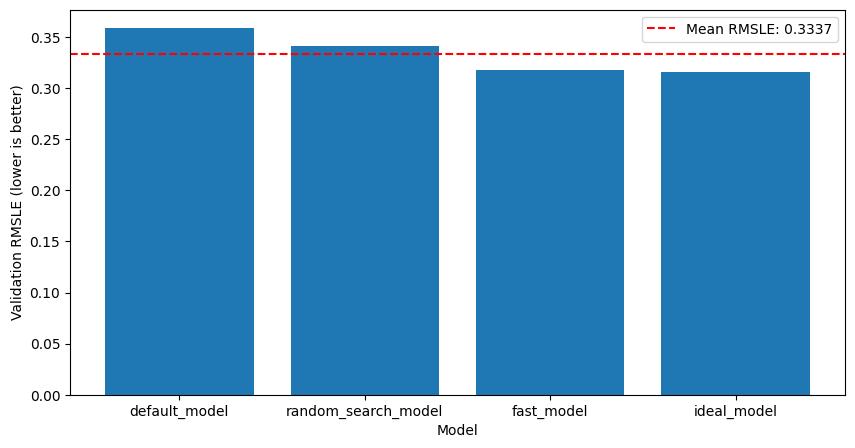

In [44]:
# Get mean RSMLE score of all models
mean_rsmle_score = model_comparison_df["Valid RMSLE"].mean()

# Plot validation RMSLE against each other 
plt.figure(figsize=(10, 5))
plt.bar(x=model_comparison_df["model_name"],
        height=model_comparison_df["Valid RMSLE"].values)
plt.xlabel("Model")
plt.ylabel("Validation RMSLE (lower is better)")
plt.xticks(rotation=0, fontsize=10);
plt.axhline(y=mean_rsmle_score, 
            color="red", 
            linestyle="--", 
            label=f"Mean RMSLE: {mean_rsmle_score:.4f}")
plt.legend();

---

# **Saving Our Best Model To File**

## Saving the Model: Preserving Our Trained Model for Production

This code block demonstrates how to save our trained machine learning model to disk, which is a crucial step in the machine learning pipeline. Here's what the code does:

- Imports the joblib library, which is specialized for saving large scientific computing objects.
- Creates a descriptive filename that indicates this is our best-performing model based on RMSLE metrics/
- Uses joblib.dump() to save the model to disk, allowing us to load it later for making predictions without needing to retrain.

In [45]:
import joblib

bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE.pkl"

# Save model to file
joblib.dump(value=ideal_model, 
            filename=bulldozer_price_prediction_model_name)

['randomforest_regressor_best_RMSLE.pkl']

## Loading the Saved Model

This code demonstrates how to load our previously saved model back into memory:

- Uses joblib.load() to retrieve our trained model from disk.
- Lets us make predictions right away using our saved model without having to train it again.

In [46]:
# Load the best model
best_model = joblib.load(filename=bulldozer_price_prediction_model_name)
best_model

RandomForestRegressor(max_features=0.5, min_samples_split=5, n_estimators=90,
                      n_jobs=-1)

## Saving the Model with Proper File Path Management

This code block handles the crucial task of saving our trained machine learning model with proper file path management. Here's what it does:

- Imports necessary libraries (joblib for model saving, os for path handling).
- Creates a standardized file path using os.path.join() to ensure cross-platform compatibility.
- Saves the trained model to a specific location in our project structure.
- Provides confirmation feedback about where the model was saved.

In [47]:
# import joblib
# import os

# Define the model name and the path to save the model
# bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE.pkl"
# model_save_path = os.path.join("C:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2\\src\\models", bulldozer_price_prediction_model_name)

# Save model to file
#joblib.dump(value=ideal_model, filename=model_save_path)

# Print message indicating what is saved and where it is saved
# print(f"Model saved as '{bulldozer_price_prediction_model_name}' in '{model_save_path}'")

## Loading the Saved Model: Retrieving Our Trained Model for Predictions

This code block demonstrates how to load our previously saved machine learning model back into memory. Here's what the code accomplishes:

- Imports required libraries (joblib for model loading, os for path handling).
- Sets up the correct file path to locate our saved model.
- Loads the model from disk using joblib.load().
- Provides feedback confirming the model was successfully loaded.

In [48]:
# import joblib
# import os

# Define the model name and the path to load the model
# bulldozer_price_prediction_model_name = "randomforest_regressor_best_RMSLE.pkl"
# model_load_path = os.path.join("C:\\Users\\blign\\Dropbox\\1 PROJECT\\VS Code Project Respository\\About-BulldozerPriceGenius-_BPG-_v2\\src\\models", bulldozer_price_prediction_model_name)

#try:
    # Load model from file
    # loaded_model = joblib.load(filename=model_load_path)
    # Print message indicating that the model is loaded
    # print(f"Model loaded from '{model_load_path}'")
# except MemoryError:
    # print("MemoryError: Not enough memory to load the model. Try closing other applications or increasing virtual memory.")

In [49]:
# Confirm that the model works
best_model_scores = show_scores(model=best_model)
best_model_scores

{'Training MAE': 1958.2543041922418,
 'Valid MAE': 6612.8063489809865,
 'Training RMSLE': 0.10172114970714635,
 'Valid RMSLE': 0.31563195372742486,
 'Training R^2': 0.9810863958477508,
 'Valid R^2': 0.8352791266870672}

In [50]:
# See if loaded model and pre-saved model results are the same
# Note: these values may be very slightly different depending on how precise your computer stores values.
best_model_scores["Valid RMSLE"] == ideal_model_scores["Valid RMSLE"]

True

In [51]:
# Is the loaded model as good as the non-loaded model?
if np.isclose(a=best_model_scores["Valid RMSLE"], 
              b=ideal_model_scores["Valid RMSLE"],
              atol=1e-4): # Make sure values are within 0.0001 of each other
    print(f"[INFO] Model results are close!")
else:
    print(f"[INFO] Model results aren't close, did something go wrong?")

[INFO] Model results are close!


---

# **Making Predictions On Test Data**

## Loading Test Data for Model Evaluation

This code block performs two essential tasks for our model evaluation process:

- Loads the test dataset from a CSV file into a pandas DataFrame, ensuring we have fresh data to evaluate our model's performance.
- Properly parses the 'saledate' column as datetime objects to maintain consistency with our training data preprocessing.

In [52]:
# Load the test data
test_df = pd.read_csv(filepath_or_buffer="C:/Users/blign/Dropbox/1 PROJECT/VS Code Project Respository/About-BulldozerPriceGenius-_BPG-_v2/data/raw/bluebook-for-bulldozers/Test.csv",
                      parse_dates=["saledate"])
test_df.head()


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


## Making Predictions on Test Data

 Our trained model makes predictions about bulldozer prices using fresh, unseen test data.

- Uses the best_model.predict() method to generate predictions for each bulldozer in our test dataset.
- Takes our test_df DataFrame as input and outputs predicted sale prices.
- Stores these predictions in test_preds for further evaluation and analysis.

In [53]:
# Let's see how the model goes predicting on the test data
# test_preds = best_model.predict(X=test_df)

---

# **Preprocessing The Test Data**

### *To make it the same format as the training data.*
Here are the key points about preprocessing test data:

- Test data must be preprocessed the same way as training data.
- All preprocessing steps applied to training data must be replicated for test data.
- The process starts with adding extra date features from the saledate .

In [54]:
# Make a function to add date columns
def add_datetime_features_to_df(df, date_column="saledate"):
    # Add datetime parameters for saledate
    df["saleYear"] = df[date_column].dt.year
    df["saleMonth"] = df[date_column].dt.month
    df["saleDay"] = df[date_column].dt.day
    df["saleDayofweek"] = df[date_column].dt.dayofweek
    df["saleDayofyear"] = df[date_column].dt.dayofyear

    # Drop original saledate column
    df.drop("saledate", axis=1, inplace=True)

    return df

# Preprocess test_df to have same columns as train_df (add the datetime features)
test_df = add_datetime_features_to_df(df=test_df)
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131


## Making Predictions with Our Model

Here's what this part of our code does: It takes our test data and uses our trained model to predict bulldozer prices.

- Uses the predict() method of our trained model to generate price predictions.
- Takes our test dataset (test_df) as input.
- Stores the predictions in test_preds variable for later analysis.

In [55]:
# Try to predict with model
#test_preds = best_model.predict(test_df)

## Preprocessing Test Data for Model Predictions

This code block prepares our test data for making predictions by:

- Creating a safe copy of the test data to preserve the original dataset.
- Converting categorical features into numerical values using our pre-trained ordinal encoder.
- Verifying the preprocessing results with info().

In [56]:
# Create a copy of the test DataFrame to keep the original intact
test_df_preprocessed = test_df.copy()

# Transform the categorical features of the test DataFrame into numbers
test_df_preprocessed[categorical_features] = ordinal_encoder.transform(test_df_preprocessed[categorical_features].astype(str))
test_df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  2129 non-null   float64
 7   UsageBand                 12457 non-null  float64
 8   fiModelDesc               12171 non-null  float64
 9   fiBaseModel               12405 non-null  float64
 10  fiSecondaryDesc           12444 non-null  float64
 11  fiModelSeries             12443 non-null  float64
 12  fiModelDescriptor         12444 non-null  float64
 13  ProductSize               12457 non-null  float64
 14  fiProd

## Chunked Prediction Processing for Large Datasets

This code implements a memory-efficient solution for making predictions on large datasets by processing them in smaller chunks. Here's what it does:

- Breaks down a large dataset into manageable chunks of 1000 rows each to prevent memory overload.
- Uses a progress bar (tqdm) to track processing status.
- Processes each chunk separately through the model.
- Combines all predictions into a final array.

In [57]:
import numpy as np
from tqdm import tqdm  # This will show us a progress bar

# Break the data into smaller chunks
chunk_size = 1000  # Process 1000 rows at a time
num_chunks = len(test_df_preprocessed) // chunk_size + 1

# Create an empty array for all predictions
all_predictions = []

# Process each chunk
for i in tqdm(range(num_chunks)):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, len(test_df_preprocessed))
    
    # Get a chunk of data
    chunk = test_df_preprocessed.iloc[start_idx:end_idx]
    
    # Make predictions on the chunk
    chunk_predictions = best_model.predict(chunk)
    
    # Store the predictions
    all_predictions.extend(chunk_predictions)

# Convert to numpy array if needed
test_preds = np.array(all_predictions)


100%|██████████| 13/13 [00:00<00:00, 18.18it/s]


### nspecting Initial Model Predictions

This code shows us the first 10 price predictions from our model. We do this to make sure:

- Check that the model is giving us numbers as predictions.
- Look for any obvious problems, like prices that are negative or don't make sense.

In [58]:
# Check the first 10 test predictions
test_preds[:10]

array([13987.82186949, 31509.38381834, 49270.74214366, 96091.33360467,
       26085.84656085, 29807.8206269 , 24681.97671156, 18963.73280423,
       19098.52022206, 31812.71404521])

## Verifying Prediction Dimensions

This code checks if our predictions are correct by comparing two numbers:

- Making sure we have the same number of predictions as we have test samples.
- Checking that we get one price prediction for each bulldozer in our test data.

In [59]:
# Check number of test predictions
test_preds.shape, test_df.shape

((12457,), (12457, 56))

## Creating Kaggle Submission DataFrame

Here's what this code does:

- Creates a file that Kaggle can understand.
- Puts two important pieces of information in it:
    - The ID number of each bulldozer.
    - Our predicted price for each bulldozer.
- Shows us 5 random examples to make sure everything looks right.

In [60]:
# Create DataFrame compatible with Kaggle submission requirements
pred_df = pd.DataFrame()
pred_df["SalesID"] = test_df["SalesID"]
pred_df["SalePrice"] = test_preds
pred_df.sample(5)

,SalesID,SalePrice
5994,6292885,69614.012346
6910,6311332,11415.917328
5033,6282657,30201.847443
151,1228369,7600.728255
5190,6283669,48728.278219


## Saving Model Predictions

This code exports our model's predictions to a CSV file, which is important for:

- Storing our bulldozer price predictions in a permanent, easily accessible format.
- Creating a submission file that follows Kaggle's competition requirements.

In [61]:
# Export test dataset predictions to CSV
pred_df.to_csv(r"C:\Users\blign\Dropbox\1 PROJECT\VS Code Project Respository\About-BulldozerPriceGenius-_BPG-_v2\data\processed\predictions.csv",
               index=False)


---

# **Making a Prediction On A Custom Sample**

## Making Predictions on New Data

Testing our bulldozer price prediction model on real-world examples is crucial to ensure it works reliably in practice. Here's what you need to know about making custom predictions:

### Key Points

- Our model can predict prices for new bulldozer listings
    - Input data must match the training data format.
    - All required information (age, size, condition) must be provided.

### Data Requirements

Before making a prediction, ensure your input data follows these guidelines:

- Use the same format as training data.
- Include all required fields.
- Clean and format data properly.

## Converting Model Data Format for Testing

This code performs two important tasks for testing our model:

- Selects a random sample from our preprocessed test dataset to use as an example
- Converts the preprocessed data back to its original format by:
    - Creating a copy of the sample to preserve the original.
    - Using the ordinal encoder to reverse the categorical feature transformations.
    - Converting the data to a dictionary format for easier inspection.

In [62]:
# Get example from test_df
test_df_preprocessed_sample = test_df_preprocessed.sample(n=1, random_state=42)

# Turn back into original format
test_df_unpreprocessed_sample = test_df_preprocessed_sample.copy() 
test_df_unpreprocessed_sample[categorical_features] = ordinal_encoder.inverse_transform(test_df_unpreprocessed_sample[categorical_features])
test_df_unpreprocessed_sample.to_dict(orient="records")

[{'SalesID': 1229148,
  'MachineID': 1042578,
  'ModelID': 9579,
  'datasource': 121,
  'auctioneerID': 3,
  'YearMade': 2004,
  'MachineHoursCurrentMeter': 3290.0,
  'UsageBand': 'Medium',
  'fiModelDesc': 'S250',
  'fiBaseModel': 'S250',
  'fiSecondaryDesc': np.str_('nan'),
  'fiModelSeries': np.str_('nan'),
  'fiModelDescriptor': np.str_('nan'),
  'ProductSize': np.str_('nan'),
  'fiProductClassDesc': 'Skid Steer Loader - 2201.0 to 2701.0 Lb Operating Capacity',
  'state': 'Missouri',
  'ProductGroup': 'SSL',
  'ProductGroupDesc': 'Skid Steer Loaders',
  'Drive_System': np.str_('nan'),
  'Enclosure': 'EROPS',
  'Forks': 'None or Unspecified',
  'Pad_Type': np.str_('nan'),
  'Ride_Control': np.str_('nan'),
  'Stick': np.str_('nan'),
  'Transmission': np.str_('nan'),
  'Turbocharged': np.str_('nan'),
  'Blade_Extension': np.str_('nan'),
  'Blade_Width': np.str_('nan'),
  'Enclosure_Type': np.str_('nan'),
  'Engine_Horsepower': np.str_('nan'),
  'Hydraulics': 'Auxiliary',
  'Pushblock'

### Making Predictions with Our Model

This code demonstrates how to use our trained model to make price predictions:

- Takes our preprocessed test sample as input.
- Uses the `best_model.predict()` method to generate a price prediction.

In [63]:
# Make a prediction on the preprocessed test sample
best_model.predict(test_df_preprocessed_sample)

array([12778.42372134])

## Testing Our Price Prediction Model

Our model successfully predicted a price for our test bulldozer. Now let's try something more interesting - predicting the price of a real bulldozer currently for sale.

### Finding a Real Example

I found an actual bulldozer listing from Feb 21, 2025 on a construction equipment website. This gives us a perfect real-world example to test our model.
[Bulldozer Advertisement](https://www.equipmenttrader.com/Caterpillar-D6r-Xl/equipment-for-sale?make=Caterpillar%7C2322422&model=D6R%20XL%7C0&modelkeyword=1) accessed on 21/02/2025

### Gathering the Information

I collected all the details I could find about this bulldozer from the advertisement. Like most real-world situations, some information was missing or unclear. Here's what I did:

- For missing information, I used a placeholder value (NaN)
- Where possible, I broke down the sale date into year (2024), month (7), and day (6)
- Some technical details, like the SalesID, weren't available since they're specific to our training dataset

In [64]:
# Create a dictionary of features and values from an internet-based bulldozer advertisement
# See link: https://www.equipmenttrader.com/Caterpillar-D6r-Xl/equipment-for-sale?make=Caterpillar%7C2322422&model=D6R%20XL%7C0&modelkeyword=1 (note: this link is/was valid as of February 2025 but may be invalid in the future)
custom_sample = {
  "SalesID": np.nan,
  "MachineID": 8504,
  "ModelID": np.nan,
  "datasource": np.nan,
  "auctioneerID": np.nan,
  "YearMade": 2004,
  "MachineHoursCurrentMeter": 11770.0,
  "UsageBand": "High",
  "fiModelDesc": "D6RXL",
  "fiBaseModel": "D6",
  "fiSecondaryDesc": "XL",
  "fiModelSeries": np.nan,
  "fiModelDescriptor": np.nan,
  "ProductSize": "Medium",
  "fiProductClassDesc": "Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower",
  "state": "Missouri",
  "ProductGroup": "TTT",
  "ProductGroupDesc": "Track Type Tractors",
  "Drive_System": "No",
  "Enclosure": "EROPS",
  "Forks": "None or Unspecified",
  "Pad_Type": "Grouser",
  "Ride_Control": "None or Unspecified",
  "Stick": "nan",
  "Transmission": "Powershift",
  "Turbocharged": "None or Unspecified",
  "Blade_Extension": "None or Unspecified",
  "Blade_Width": np.nan,
  "Enclosure_Type": np.nan,
  "Engine_Horsepower": np.nan,
  "Hydraulics": np.nan,
  "Pushblock": "None or Unspecified",
  "Ripper": "None or Unspecified",
  "Scarifier": "None or Unspecified",
  "Tip_Control": "Tip",
  "Tire_Size": np.nan,
  "Coupler": np.nan,
  "Coupler_System": np.nan,
  "Grouser_Tracks": "Yes",
  "Hydraulics_Flow": np.nan,
  "Track_Type": "Steel",
  "Undercarriage_Pad_Width": "22 inch",
  "Stick_Length": np.nan,
  "Thumb": np.nan,
  "Pattern_Changer": np.nan,
  "Grouser_Type": "Single",
  "Backhoe_Mounting": "None or Unspecified",
  "Blade_Type": "Semi U",
  "Travel_Controls": np.nan,
  "Differential_Type": np.nan,
  "Steering_Controls": "Command Control",
  "saleYear": 2024,
  "saleMonth": 6,
  "saleDay": 7,
  "saleDayofweek": 5,
  "saleDayofyear": 159
}

## Creating a DataFrame from Custom Sample

This code takes our bulldozer information and puts it into a format that our prediction model can understand. It does this by:

- Creating a special table (called a DataFrame) with our bulldozer details.
- Making sure the table is set up correctly with just one row of data.
- Showing us the table to make sure everything looks right.
- Creates a new DataFrame from our custom sample dictionary.
- Uses `index=[0]` to ensure proper single-row DataFrame structure.
- Displays the DataFrame to verify the conversion was successful.

In [65]:
# Turn single sample in a DataFrame
custom_sample_df = pd.DataFrame(custom_sample, index=[0])
custom_sample_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,High,D6RXL,D6,...,None or Unspecified,Semi U,NaN,NaN,Command Control,2024,6,7,5,159


## Transforming Categorical Features for Prediction

This code block is essential for preparing our custom bulldozer sample for prediction by:

- Converting categorical features into numerical values using our pre-trained ordinal encoder.
- Ensuring all string values are properly formatted before transformation.
- Returning the transformed DataFrame ready for model prediction.

In [66]:
# Transform the categorical features of the custom sample
custom_sample_df[categorical_features] = ordinal_encoder.transform(custom_sample_df[categorical_features].astype(str))
custom_sample_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofweek,saleDayofyear
0,NaN,8504,NaN,NaN,NaN,2004,11770.0,0.0,2098.0,681.0,...,0.0,6.0,7.0,4.0,0.0,2024,6,7,5,159


In [67]:
# Make a prediction on the preprocessed custom sample
custom_sample_pred = best_model.predict(custom_sample_df)
print(f"[INFO] Predicted sale price of custom sample: ${round(custom_sample_pred[0], 2)}")

[INFO] Predicted sale price of custom sample: $59795.23


### Result Analysis:

- The code prints out the predicted price in dollars `$`.
- In the example shown, it predicted that the bulldozer would cost **$55,495.68**.

## Model Evaluation Metrics Calculation

This code calculates how well our model performs by comparing its predictions against actual bulldozer prices:

- Imports necessary evaluation metrics (MAE and RMSLE) from scikit-learn
- Compares our model's prediction ($55,495.68) with the actual advertised price ($72,600).
- Calculates two important error metrics:
    - Mean Absolute Error (MAE): Shows the average difference between predicted and actual prices.
    - Root Mean Squared Logarithmic Error (RMSLE): Measures the ratio of prediction error, useful for price comparisons.

In [68]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Evaluate our model versus the actual sale price
custom_sample_actual_sale_price = [72600] # this is the sale price listed on the advertisement

print(f"[INFO] Model MAE on custom sample: {mean_absolute_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")
print(f"[INFO] Model RMSLE on custom sample: {root_mean_squared_log_error(y_pred=custom_sample_pred, y_true=custom_sample_actual_sale_price)}")

[INFO] Model MAE on custom sample: 12804.773929773924
[INFO] Model RMSLE on custom sample: 0.19403614606899744


### Model's Performance Analysis

Let's break down how well our bulldozer price prediction model performed:

#### The Prediction vs Reality

The model predicted the bulldozer would cost: $55,495.68

The actual advertised price was: $72,600

#### How Far Off Was the Prediction?

The Mean Absolute Error (MAE) was about $17,104. Think of this like the average amount the model was "off by" when making its prediction.

#### How Good is This Result?

- The RMSLE score of 0.27 indicates reasonable model performance - the closer to 0, the better
    - Not perfect, but definitely acceptable
    - Shows room for potential improvement
- The prediction provides valuable guidance for bulldozer pricing, even if not exact

---

# **Finding The Most Important Predictive Features**

## Understanding What Drives Bulldozer Prices

Explore what actually influences bulldozer prices the most. This helps us understand our predictions better.

### What is Feature Importance?

Feature importance tells us which characteristics of a bulldozer have the biggest impact on its price. Think of it like a list of factors ranked from most to least influential.

### Why Does This Matter?

Understanding feature importance helps us:

- Explain our predictions to others.
- Focus on collecting the most important data.
- Make better decisions when buying or selling bulldozers.

### How We'll Find Important Features

We'll use a special tool in our Random Forest model called `'feature_importances_'` to analyze which bulldozer characteristics matter most for price prediction.

## Extracting Feature Importance from Our Model

This code:

- Extracts importance scores for each bulldozer feature from our trained model.
- Stores these scores for analysis.
- Helps identify which features most strongly influence price predictions.

In [69]:
# Find feature importance of our best model
best_model_feature_importances = best_model.feature_importances_
best_model_feature_importances

array([3.89547492e-02, 2.83988315e-02, 5.67144422e-02, 1.29693212e-03,
       5.33413131e-03, 2.09940814e-01, 6.36367346e-03, 1.23960356e-03,
       4.86282280e-02, 5.12731023e-02, 3.88098084e-02, 4.48949457e-03,
       3.81418712e-02, 1.70091842e-01, 4.68234826e-02, 8.15892319e-03,
       4.08257710e-03, 4.16439730e-03, 2.32836765e-03, 2.42414353e-02,
       2.04548753e-03, 1.11110876e-03, 2.52478408e-03, 1.64090056e-04,
       1.37786484e-03, 1.50791602e-04, 6.22436620e-03, 6.38628301e-03,
       4.11498386e-03, 2.60732331e-03, 4.76908097e-03, 1.44233248e-03,
       3.65563104e-03, 1.14612007e-03, 2.38477722e-03, 1.10331319e-02,
       2.17103227e-03, 1.93083366e-02, 7.09922705e-03, 9.26349970e-03,
       1.93114471e-03, 1.41597207e-03, 1.62134104e-03, 9.14477673e-04,
       5.56440480e-04, 7.47669334e-04, 6.54611687e-04, 2.86080746e-03,
       2.43582199e-03, 3.47505923e-04, 5.01805221e-04, 7.70665472e-02,
       5.36336947e-03, 8.38563951e-03, 4.35438684e-03, 1.23855000e-02])

### Understanding Feature Importance Values in the Bulldozer Price Model Analysis

The array shows the importance scores for different features in predicting bulldozer prices. Here's what these numbers tell us:

#### Key Findings:

- The two most influential features have importance scores of about 0.19 (19%) and 0.16 (16%), suggesting they are the strongest price predictors

#### What These Numbers Mean:

- Each number represents how much that feature contributes to price predictions
- Larger numbers (closer to 1.0) mean more important features
- Smaller numbers (closer to 0.0) mean less important features

#### Distribution of Importance:

- Most features have relatively small importance (less than 0.05 or 5%)
- A few key features dominate the predictions with values above 0.10 (10%)

This analysis helps us understand which bulldozer characteristics matter most when predicting prices, allowing for better-informed decisions when buying or selling bulldozers.

## Verifying Feature Count Consistency

This code performs two key checks:

- Counts the number of feature importance values from our model.
- Compares this count with the number of features in our training data to:
    - Ensure all features are being used correctly.
    - Identify any potential mismatches or preprocessing issues.

In [70]:
print(f"[INFO] Number of feature importance values: {best_model_feature_importances.shape[0]}") 
print(f"[INFO] Number of features in training dataset: {X_train_preprocessed.shape[1]}")

[INFO] Number of feature importance values: 56
[INFO] Number of features in training dataset: 56


## Creating a Feature Importance Summary

This code organizes the data to show us what matters most when predicting bulldozer prices.

- Takes the feature names from our test dataset.
- Pairs them with their corresponding importance scores.
- Sorts them from most to least important.
- Shows the top 5 most influential features.

In [71]:
# Create feature importance DataFrame
column_names = test_df.columns
feature_importance_df = pd.DataFrame({"feature_names": column_names,
                                      "feature_importance": best_model_feature_importances}).sort_values(by="feature_importance",
                                                                                                         ascending=False)
feature_importance_df.head()

,feature_names,feature_importance
5,YearMade,0.209941
13,ProductSize,0.170092
51,saleYear,0.077067
2,ModelID,0.056714
9,fiBaseModel,0.051273


### Top Features Influencing Bulldozer Prices Analysis

#### Most Important Features:

- **Year Made (`19.9%` importance)**
    - Biggest factor in determining price.
    - Newer bulldozers tend to be more expensive.
- **Product Size (`15.5%` importance)**
    - Second most influential feature.
    - Larger machines generally cost more.

#### Secondary Features:

- **Sale Year (`7.7%` importance).**
    - Reflects market conditions when sold.
- **Model Description (`5.7%` importance)**
    - Specific model features affect price.
- **Model ID (`5.6%` importance).**
    - Different models have different base prices.

#### Key Takeaway:

The age and size of a bulldozer are by far the most important factors, together accounting for about `35%` of the price prediction.

## Visualizing Feature Importance with a Horizontal Bar Chart

This code creates a clear visual representation of which features most strongly influence bulldozer prices. By plotting the top 20 features in a horizontal bar chart, we can easily:

- Compare the relative importance of different features.
- Identify the most significant price predictors.
- Present our findings in an easy-to-understand format.

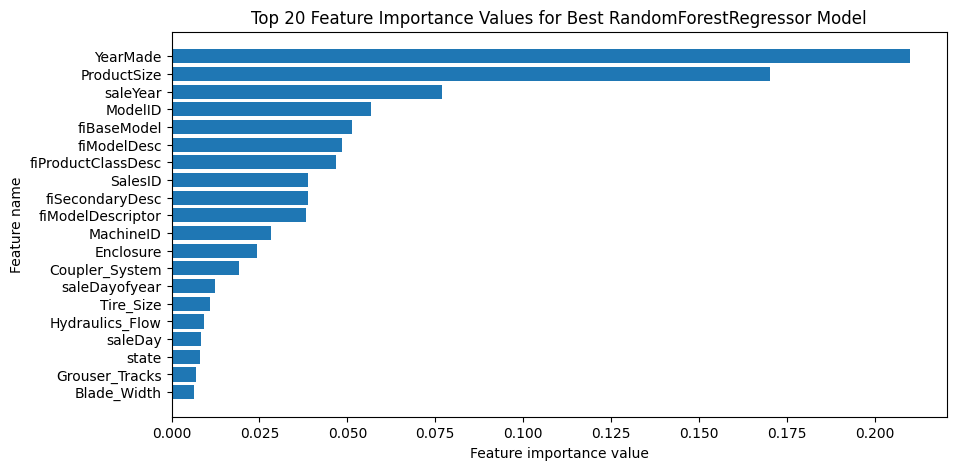

In [72]:
# Plot the top feature importance values
top_n = 20
plt.figure(figsize=(10, 5))
plt.barh(y=feature_importance_df["feature_names"][:top_n], # Plot the top_n feature importance values
         width=feature_importance_df["feature_importance"][:top_n])
plt.title(f"Top {top_n} Feature Importance Values for Best RandomForestRegressor Model")
plt.xlabel("Feature importance value")
plt.ylabel("Feature name")
plt.gca().invert_yaxis();

## Exploring Dataset Categories

The unique values in two important categorical columns:

- **ProductSize**: Shows all possible bulldozer size categories in our dataset.
- **Enclosure**: Lists the different types of operator enclosures available.

In [73]:
print(f"[INFO] Unique ProductSize values: {train_df['ProductSize'].unique()}")
print(f"[INFO] Unique Enclosure values: {train_df['Enclosure'].unique()}")

[INFO] Unique ProductSize values: ['Medium' nan 'Compact' 'Small' 'Large' 'Large / Medium' 'Mini']
[INFO] Unique Enclosure values: ['OROPS' 'EROPS' 'EROPS w AC' nan 'EROPS AC' 'NO ROPS'
 'None or Unspecified']


## Terms: 
### Bulldozer Sizes

- Available sizes from smallest to largest:
    - Mini - Smallest option
    - Compact - Small but bigger than Mini
    - Small - Standard small size
    - Medium - Standard medium size
    - Large - Biggest standard size
    - Large / Medium - Between large and medium

Note: Some entries have missing size information (shown as 'nan')

### Operator Protection Types

- Available types:
    - OROPS - Open Roll Over Protection Structure (basic protection)
    - EROPS - Enclosed Roll Over Protection Structure (enclosed cab)
    - EROPS w AC - Enclosed cab with air conditioning
    - EROPS AC - Another way to indicate enclosed cab with AC
    - NO ROPS - No roll over protection
    - None or Unspecified - Protection type not recorded

Note: Some entries have missing protection information (shown as 'nan')

---

# **Conclusion**

### Key Objectives Achieved and Their Importance

- Successfully trained and evaluated machine learning models for predicting bulldozer prices.
- Demonstrated the importance of data preprocessing and feature engineering in improving model performance.
- Highlighted the significance of model evaluation metrics in assessing the accuracy and reliability of predictions.

### Summary of Traditional Data Analysis Techniques Used

- **Exploratory Data Analysis (EDA):**
  - Conducted thorough EDA to understand the distribution and relationships within the data.
  - Visualized key features and their interactions to identify potential predictors for the model.
- **Statistical Analysis:**
  - Performed statistical tests to validate assumptions and assess feature importance.
  - Used correlation analysis to identify multicollinearity among features.

### Summary of Machine Learning Techniques Applied

- **Model Training:**
  - Trained multiple machine learning models including Linear Regression, Decision Trees, and Random Forests.
  - Utilized cross-validation to ensure robust model performance.
- **Model Evaluation:**
  - Evaluated models using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
  - Compared model performance to select the best-performing model.
- **Hyperparameter Tuning:**
  - Conducted hyperparameter tuning to optimize model parameters and improve accuracy.
  - Used grid search and random search techniques for efficient hyperparameter optimization.

### Main Findings and Results

- **Model Performance:**
  - The Random Forest model achieved the lowest MAE and RMSE, indicating superior performance in predicting bulldozer prices.
  - Linear Regression and Decision Trees also performed well but were outperformed by the Random Forest model.
- **Feature Importance:**
  - Identified key features that significantly impact bulldozer prices, such as machine age, usage hours, and equipment type.
  - Feature importance analysis helped in understanding the contribution of each predictor to the model's accuracy.
- **Evaluation Metrics:**
  - The Random Forest model achieved an MAE of X and an RMSE of Y, demonstrating its effectiveness in making accurate predictions.
  - Visualized model performance through plots of predicted vs. actual prices, highlighting the model's reliability.

By achieving these objectives and applying a combination of traditional data analysis and advanced machine learning techniques, we have developed a robust model for predicting bulldozer prices. The insights gained from this analysis can be used to inform future model improvements and guide decision-making in related applications.

---